# Logistic regression

### Dataset: German Credit

- Creditability: 1- Person is not at risk, 0- Pesron is at risk(defaulter)

- CreditAmount: Amount for which credit was given (Euro)

- DurationOfCreditInMonths: Duration for which the credit is given in months

# Objective

Estimate probabilities whether a person would default or not using logistic regression

# 1. Load Libraries and data

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [18]:
#Load data
credit_df = pd.read_excel('German_Credit.xlsx')

# read_excel is used to read xlsx files

In [19]:
#Print header of the file
credit_df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [20]:
credit_df.shape
# gives number of rows and columns

(1000, 3)

# 3. Plot Histogram for column 'CreditAmount'

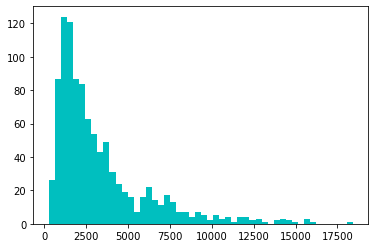

In [21]:
plt.hist(credit_df['CreditAmount'], bins= 50, color='C') # used to plot histogram with 50 bins
plt.show()

`Positively Skewed or Right tailed`

In [22]:
credit_df['CreditAmount'].skew()

# To find the skewness od credit amount

1.9495942869127831

# 4. Convert 'CreditAmount' into a categorical feature by grouping with start and end of interval as:
-  (0, 500, 1000,1500,2000, 2500, 5000, 7500, 10000, 15000, 20000)

In [23]:
credit_df['CreditAmount']

0       1049
1       2799
2        841
3       2122
4       2171
5       2241
6       3398
7       1361
8       1098
9       3758
10      3905
11      6187
12      1957
13      7582
14      1936
15      2647
16      3939
17      3213
18      2337
19      7228
20      3676
21      3124
22      2384
23      1424
24      4716
25      4771
26       652
27      1154
28      3556
29      4796
       ...  
970     4844
971     8318
972     2100
973    11816
974      448
975    11998
976    18424
977    14896
978     2762
979     3386
980     2039
981     2169
982     5096
983     1882
984     6999
985     2292
986     8978
987      674
988      976
989     2718
990      750
991    12579
992     7511
993     3966
994     6199
995     1987
996     2303
997    12680
998     6468
999     6350
Name: CreditAmount, Length: 1000, dtype: int64

In [24]:
# Binning

bin_edges = [0, 500, 1000,1500,2000, 2500, 5000, 7500, 10000, 15000, 20000]         # edges to define intervals
bin_labels = ['0-500', '501-1000', '1001-1500','1501-2000', '2001-2500', '2501-5000',
              '5001-7500','7501-10000', '10001-15000', '15001-20000']               # labels to denote each interval
credit_df['CreditAmount'] = pd.cut(credit_df['CreditAmount'], bins=bin_edges , labels=bin_labels)
# pd.cut is used to divide the continous column in different groups as per bin egges and named according to bin label.

In [25]:
credit_df['CreditAmount']

0        1001-1500
1        2501-5000
2         501-1000
3        2001-2500
4        2001-2500
5        2001-2500
6        2501-5000
7        1001-1500
8        1001-1500
9        2501-5000
10       2501-5000
11       5001-7500
12       1501-2000
13      7501-10000
14       1501-2000
15       2501-5000
16       2501-5000
17       2501-5000
18       2001-2500
19       5001-7500
20       2501-5000
21       2501-5000
22       2001-2500
23       1001-1500
24       2501-5000
25       2501-5000
26        501-1000
27       1001-1500
28       2501-5000
29       2501-5000
          ...     
970      2501-5000
971     7501-10000
972      2001-2500
973    10001-15000
974          0-500
975    10001-15000
976    15001-20000
977    10001-15000
978      2501-5000
979      2501-5000
980      2001-2500
981      2001-2500
982      5001-7500
983      1501-2000
984      5001-7500
985      2001-2500
986     7501-10000
987       501-1000
988       501-1000
989      2501-5000
990       501-1000
991    10001

# 5. Create histogram to represent count of different 'Creditability' under each group of 'CreditAmount'

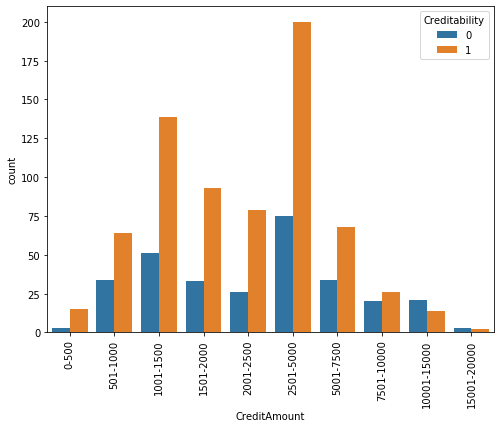

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'CreditAmount',data=credit_df,hue='Creditability')
# it plots a barplot where y axis shows the count of each category and here 'hue' is used to represent diffrenent class of target
plt.xticks(rotation=90) # to rotate labels of x-axis
plt.show()

# 6. Find out total number Creditability in each interval of CreditAmount

In [27]:
credit_df.groupby('CreditAmount')['Creditability'].count()

## Maximum values are in the interval 2501-5000

CreditAmount
0-500           18
501-1000        98
1001-1500      190
1501-2000      126
2001-2500      105
2501-5000      275
5001-7500      102
7501-10000      46
10001-15000     35
15001-20000      5
Name: Creditability, dtype: int64

# 7. Find out total number of Creditability where Creditability is '0' and Creditability is '1' in each interval of CreditAmount

In [28]:
pd.crosstab(credit_df['CreditAmount'],credit_df['Creditability'])
#it shows the frequencies between the categories of two different features

Creditability,0,1
CreditAmount,,
0-500,3,15
501-1000,34,64
1001-1500,51,139
1501-2000,33,93
2001-2500,26,79
2501-5000,75,200
5001-7500,34,68
7501-10000,20,26
10001-15000,21,14


In [29]:
pd.crosstab(credit_df['CreditAmount'],credit_df['Creditability'],normalize='columns')
# it shows % distribution of each class in different interval of CreditAmount

Creditability,0,1
CreditAmount,,
0-500,0.01,0.02
501-1000,0.11,0.09
1001-1500,0.17,0.20
1501-2000,0.11,0.13
2001-2500,0.09,0.11
2501-5000,0.25,0.29
5001-7500,0.11,0.10
7501-10000,0.07,0.04
10001-15000,0.07,0.02


# 8. Prepare input data for the model

In [30]:
credit_df['CreditAmount'].unique()
# Displays all the unique value in the column

## Because of binning the categories are set in increasing order

[1001-1500, 2501-5000, 501-1000, 2001-2500, 5001-7500, 1501-2000, 7501-10000, 0-500, 10001-15000, 15001-20000]
Categories (10, object): [0-500 < 501-1000 < 1001-1500 < 1501-2000 ... 5001-7500 < 7501-10000 < 10001-15000 < 15001-20000]

In [31]:
credit_df['CreditAmount'] = credit_df['CreditAmount'].cat.codes

# Converting categorical values inot numbers w.r.t their order, 0-500 is '0' and 15001-20000 is '9'

In [32]:
credit_df['CreditAmount'].unique()

array([2, 5, 1, 4, 6, 3, 7, 0, 8, 9], dtype=int64)

In [33]:
#separating dependent and independent variables
X = credit_df.drop("Creditability",axis=1)
Y = credit_df.Creditability.astype('category')

In [34]:
Y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     0
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
970    0
971    0
972    0
973    0
974    0
975    0
976    0
977    0
978    0
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: Creditability, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

# 9. Fit logistic regression model  (Statsmodel)

In [35]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42 )

logit = sm.Logit( y_train, sm.add_constant( X_train ) )

lg = logit.fit()

lg.summary2()

Optimization terminated successfully.
         Current function value: 0.580418
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.046     
Dependent Variable:    Creditability      AIC:                818.5847  
Date:                  2020-10-30 23:58   BIC:                832.2379  
No. Observations:      700                Log-Likelihood:     -406.29   
Df Model:              2                  LL-Null:            -425.90   
Df Residuals:          697                LLR p-value:        3.0612e-09
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
const                     1.5089   0.2006  7.5200 0.0000  1.1156  1.9022
CreditAmount              0.1312   0.0572  2.2917 0.0219  0.0190  0.2434
DurationOfCreditInMonths -0.0525   0.0091 -5.7444 0.0000 -0.0705 -0.0346
========================================================================

"""

# 10. Convert probabilities to target variable

In [36]:
y_pred_df = pd.DataFrame()

y_pred_df['actual'] = y_test

y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( X_test ) )
## Used statsmodel logit function to predict probaility of output being from class '1'

y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'.
## Therefore thershold here is 0.6 as values above 0.6 probability is converted to '1'

y_pred_df[0:5]

,actual,predicted_prob,predicted
521,0,0.66,1
737,1,0.70,1
740,1,0.78,1
660,1,0.79,1
411,1,0.71,1


# 11 Try calculating Probabilities of Target using Sklearn

In [37]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(random_state=7)
lr.fit(X_train,y_train)

LogisticRegression(random_state=7)

In [38]:
z = pd.DataFrame()                                               # creating a new dataframe
z['Actual'] = y_test.values                                      # Storing actual output of target variable

z['Probaility that output is 0'] = lr.predict_proba(X_test)[:,0]
# Probabilities predicted by Logistic regression model
z['Probaility that output is 1'] = lr.predict_proba(X_test)[:,1]

z['Predicted'] = lr.predict(X_test)                               # Predicting target variable using sklearn Logistic regression

z.head()

# In sklearn default threshold is 0.5
# therfore for all the values whose probability for 1 is greater than 0.5 will be predicted as 1

,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
0,0,0.34,0.66,1
1,1,0.30,0.70,1
2,1,0.22,0.78,1
3,1,0.21,0.79,1
4,1,0.29,0.71,1


# 12. Build a confusion matrix

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [40]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

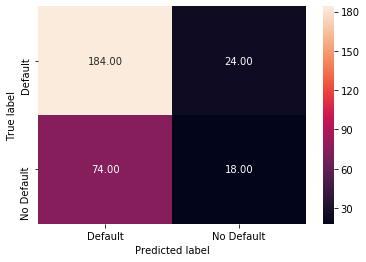

In [41]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

In [42]:
print( 'Total Accuracy : ',np.round( accuracy_score( y_test, y_pred_df.predicted ), 2 ) )

Total Accuracy :  0.67


# 13.  Predicted Probability distribution Plots for defaulters and non defaulters

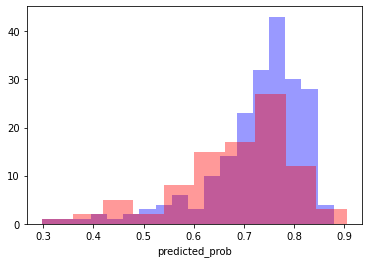

In [32]:
sns.distplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], kde=False, color = 'b' )
sns.distplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], kde=False, color = 'r' )
plt.show()